In [1]:
import numpy as np
import matplotlib.pyplot as plt

from utils import bullet, speed

In [2]:
data = np.loadtxt('../dataset/898/1376323154598')
head, tail = data[:-30], data[-31:]
print(head, '\n\n', tail)

[[6.25980080e+01 2.97445710e+01 1.37632315e+12 0.00000000e+00]
 [6.25980290e+01 2.97445720e+01 1.37632316e+12 0.00000000e+00]
 [6.25980770e+01 2.97445780e+01 1.37632316e+12 0.00000000e+00]
 [6.25981290e+01 2.97445980e+01 1.37632316e+12 0.00000000e+00]
 [6.25981830e+01 2.97446300e+01 1.37632316e+12 0.00000000e+00]
 [6.25982360e+01 2.97446570e+01 1.37632316e+12 0.00000000e+00]
 [6.25982900e+01 2.97446840e+01 1.37632317e+12 0.00000000e+00]
 [6.25983430e+01 2.97447220e+01 1.37632317e+12 0.00000000e+00]
 [6.25983960e+01 2.97447550e+01 1.37632317e+12 0.00000000e+00]
 [6.25984510e+01 2.97447970e+01 1.37632317e+12 0.00000000e+00]
 [6.25985040e+01 2.97448180e+01 1.37632318e+12 0.00000000e+00]
 [6.25985590e+01 2.97448260e+01 1.37632318e+12 0.00000000e+00]
 [6.25986060e+01 2.97448560e+01 1.37632318e+12 0.00000000e+00]
 [6.25986890e+01 2.97449080e+01 1.37632318e+12 0.00000000e+00]
 [6.25987400e+01 2.97449470e+01 1.37632318e+12 0.00000000e+00]
 [6.25987940e+01 2.97449900e+01 1.37632319e+12 0.000000

In [3]:
speed.calculate_speed_in_ms(head[-2], head[-1])

3.959197799186936

In [4]:
head_x, head_y = head[:, 0], head[:, 1]
tail_x, tail_y = tail[:, 0], tail[:, 1]

prediction = bullet.bullet_prediction(head[-2], head[-1], 3)
pred_x, pred_y = prediction[:, 0], prediction[:, 1]

print(prediction)

[[6.26008520e+01 2.97577680e+01 1.37632351e+12 0.00000000e+00]
 [6.26008029e+01 2.97580186e+01 1.37632351e+12 0.00000000e+00]
 [6.26007198e+01 2.97584428e+01 1.37632352e+12 0.00000000e+00]
 [6.26005998e+01 2.97590549e+01 1.37632353e+12 0.00000000e+00]]


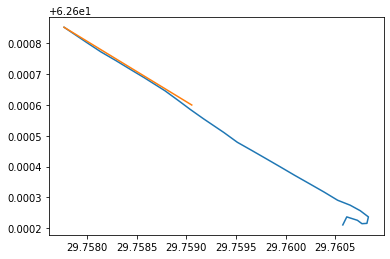

In [6]:
head_y, head_x = head_y[-10:], head_x[-10:]
#plt.plot(head_y, head_x)
plt.plot(tail_y, tail_x)
plt.plot(pred_y, pred_x)
plt.show()